# Feature definitions and plots

This notebook contains the definitions for the core features used in our analysis. For each, a boxplot is giving showing general trends. Additionally, a sample of the data collected is given (`data-sample.csv`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #color maps

In [2]:
df = pd.read_csv("../jv-xword-full.csv",
                 converters={'Answer' : str, 'Hint' : str, 'MissingLetters' : str}, 
                 encoding='latin-1',
                parse_dates=['date'])
df.rename(columns={"date" : "Date"}, inplace=True)

In [3]:
sample_data = df.sample(20)

In [4]:
#sample_data.to_csv('data-sample.csv',index=False)

## Load pre-calculated feature data

In [5]:
features = pd.read_csv('../jv-features.csv',parse_dates=['date'])
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     9757 non-null   datetime64[ns]
 1   Weekday                  9757 non-null   object        
 2   OtherPuzAns              9757 non-null   float64       
 3   BlockDensity             9757 non-null   float64       
 4   AvgHintLength            9757 non-null   float64       
 5   AvgAnswerLength          9757 non-null   float64       
 6   NumHints                 9757 non-null   int64         
 7   NumOneWordHints          9757 non-null   int64         
 8   PctOneWdHints            9757 non-null   float64       
 9   PctPerplex               9757 non-null   float64       
 10  WeekdayNum               9757 non-null   int64         
 11  NumRepeatedAnswers       9757 non-null   int64         
 12  CumTotalAnswers          9757 non-

## BlockDensity

BlockDensity is measured for each puzzle as the percentage of the puzzle grid consisting of black blocks.

In [6]:
block_data = features.groupby(['WeekdayNum','Weekday'])['BlockDensity'].agg([np.mean, np.std, list]).reset_index()
block_data

,WeekdayNum,Weekday,mean,std,list
0,0,Monday,16.664341,1.056456,"[18.66666666666667, 16.44444444444444, 17.7777..."
1,1,Tuesday,16.592331,1.056259,"[16.0, 17.77777777777778, 16.0, 14.22222222222..."
2,2,Wednesday,16.609426,1.196726,"[16.88888888888889, 17.77777777777778, 16.8888..."
3,3,Thursday,16.394120,1.449191,"[16.88888888888889, 16.88888888888889, 16.8888..."
4,4,Friday,13.954222,1.904746,"[18.66666666666667, 15.555555555555562, 22.222..."
5,5,Saturday,13.656871,1.786174,"[16.88888888888889, 16.0, 14.666666666666664, ..."
6,6,Sunday,16.781243,1.184084,"[20.037807183364837, 17.687074829931976, 15.87..."


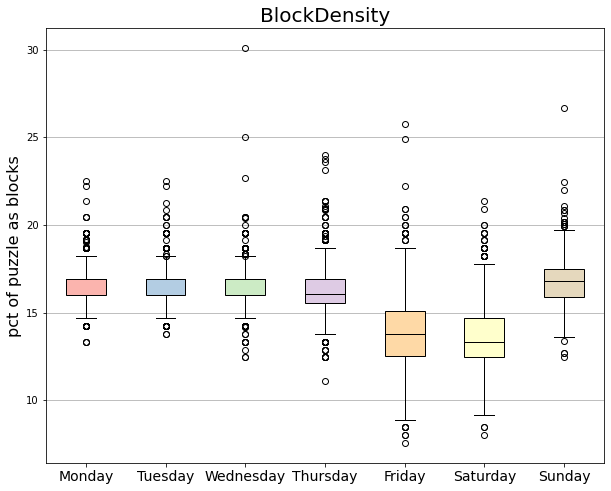

In [7]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(block_data['list'],patch_artist=True, medianprops=dict(color='black'))
ax.set_xticklabels(block_data['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('pct of puzzle as blocks',fontsize=16)
ax.set_title('BlockDensity',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="BlockDensity.png")
#plt.show()

## AvgAnswerLength

AvgAnswerLength measures the average length of the puzzle's answers.

In [8]:
f_len = features.groupby(['WeekdayNum','Weekday'])['AvgAnswerLength'].agg([np.mean, list]).reset_index().copy()
f_len

,WeekdayNum,Weekday,mean,list
0,0,Monday,4.877061,"[4.815789473684211, 5.371428571428571, 5.0, 4...."
1,1,Tuesday,4.897588,"[4.846153846153846, 4.743589743589744, 5.10810..."
2,2,Wednesday,4.938302,"[4.675, 4.743589743589744, 4.794871794871795, ..."
3,3,Thursday,5.112203,"[4.794871794871795, 4.794871794871795, 4.92105..."
4,4,Friday,5.589881,"[4.6923076923076925, 5.428571428571429, 4.7297..."
5,5,Saturday,5.662977,"[5.666666666666667, 4.846153846153846, 5.48571..."
6,6,Sunday,5.307189,"[4.976470588235294, 5.185714285714286, 5.37681..."


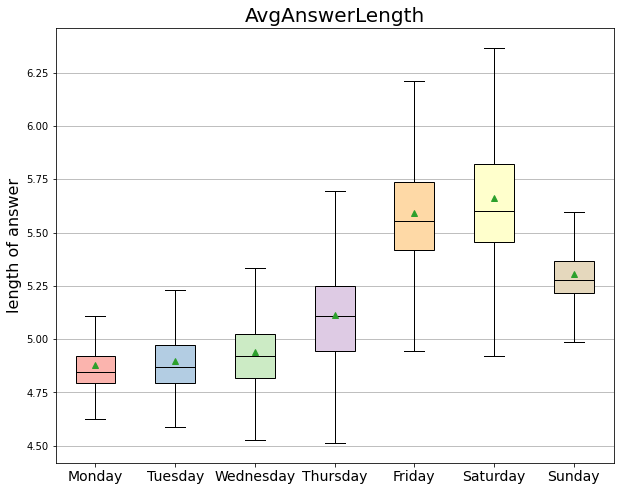

In [9]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 8)

bplot = ax1.boxplot(f_len['list'], 
                    showfliers=False, 
                    showmeans=True, 
                    patch_artist=True,
                    medianprops=dict(color='black'))
ax1.set_xticklabels(f_len['Weekday'].tolist(),fontsize=14)
ax1.set_ylabel('length of answer',fontsize=16)
ax1.set_title('AvgAnswerLength',fontsize=20)
ax1.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="AvgAnswerLength.png")
plt.show()

## AvgHintLength

AvgHintLength measures the average length (in characters) of the puzzle's hints. 

In [10]:
h_len = features.groupby(['WeekdayNum','Weekday'])['AvgHintLength'].agg([np.mean, list]).reset_index().copy()
h_len

,WeekdayNum,Weekday,mean,list
0,0,Monday,18.079926,"[13.36842105263158, 15.957142857142856, 13.527..."
1,1,Tuesday,18.014501,"[14.602564102564102, 12.307692307692308, 13.79..."
2,2,Wednesday,17.936916,"[13.3125, 15.17948717948718, 15.26923076923077..."
3,3,Thursday,18.237317,"[13.448717948717947, 15.08974358974359, 14.921..."
4,4,Friday,18.895185,"[14.08974358974359, 14.8, 13.432432432432432, ..."
5,5,Saturday,19.274796,"[14.969696969696969, 13.846153846153848, 15.42..."
6,6,Sunday,18.106967,"[15.547058823529412, 14.5, 15.58695652173913, ..."


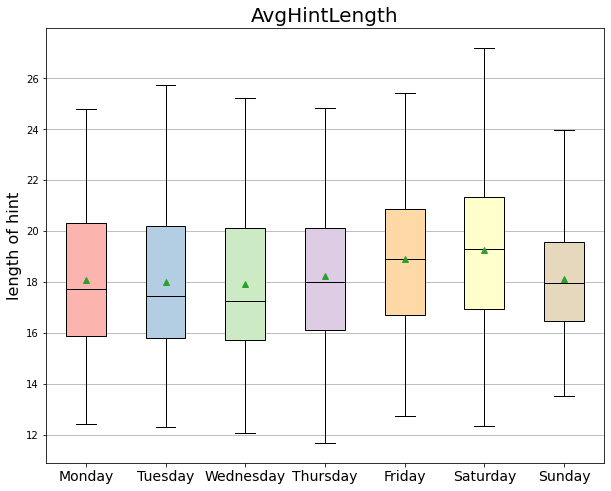

In [11]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 8)

bplot = ax1.boxplot(h_len['list'], 
                    showfliers=False, 
                    showmeans=True, 
                    patch_artist=True,
                    medianprops=dict(color='black'))
ax1.set_xticklabels(h_len['Weekday'].tolist(),fontsize=14)
ax1.set_ylabel('length of hint',fontsize=16)
ax1.set_title('AvgHintLength',fontsize=20)
ax1.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="AvgHintLength.png")
plt.show()

## OtherPuzAns

This feature first counts, for each answer in the puzzle, how many total puzzles in the dataset include that answer. An individual puzzles OtherPuzAns score is the mean of all hints for that puzzle. 

In [12]:
rarity = features.groupby(['WeekdayNum','Weekday'])['OtherPuzAns'].agg([np.mean, np.std, sum, list]).reset_index().copy()

rarity

,WeekdayNum,Weekday,mean,std,sum,list
0,0,Monday,78.138585,11.255638,109394.018852,"[89.07894736842105, 70.57142857142857, 81.7567..."
1,1,Tuesday,74.075295,11.905227,103557.262611,"[84.25641025641026, 88.08974358974359, 54.8378..."
2,2,Wednesday,71.710138,12.168271,100250.772443,"[79.4, 74.08974358974359, 63.3974358974359, 62..."
3,3,Thursday,65.211561,11.756639,90252.800571,"[92.98717948717947, 93.93589743589745, 74.8289..."
4,4,Friday,51.131815,12.929194,71737.937123,"[84.41025641025641, 37.75714285714286, 70.5405..."
5,5,Saturday,47.034400,12.172038,64813.403314,"[46.86363636363637, 98.01282051282053, 48.2428..."
6,6,Sunday,58.370779,8.569930,81485.607544,"[69.84705882352941, 62.75714285714286, 57.6521..."


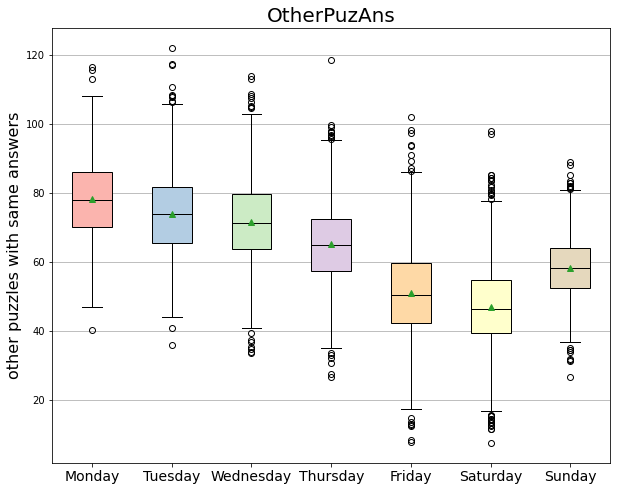

In [13]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(rarity['list'],patch_artist=True, medianprops=dict(color='black'), showfliers=True, showmeans=True)
ax.set_xticklabels(rarity['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('other puzzles with same answers',fontsize=16)
ax.set_title('OtherPuzAns',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="OtherPuzAns.png")
plt.show()

## PctPerplex

First, a bigram language model is trained on all answers. The perplexity for each answer is calculated, and all outliers are tagged, where is anything above $1.5*IQR + Q3$. The number of these perplexity outliers is counted for each puzzle as a percentage of total answers. The idea is a higher perplexity score might indicate more rare or obscure answer types. 

In [14]:
perplex_pct_data = features.groupby(['WeekdayNum','Weekday'])['PctPerplex'].agg([np.mean, list]).reset_index().sort_values('mean').copy()

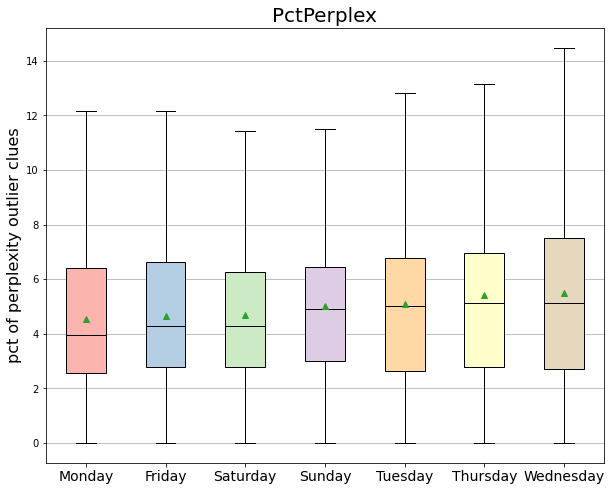

In [15]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(perplex_pct_data['list'],patch_artist=True, medianprops=dict(color='black'), showfliers=False, showmeans=True)
ax.set_xticklabels(perplex_pct_data['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('pct of perplexity outlier clues',fontsize=16)
ax.set_title('PctPerplex',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="PctPerplex.png")
plt.show()

## PctWP

Here, WP stands for *wordplay*. If a clue ends in a question mark, it indicates a play on words is involved. This feature counts the percentage of clues that end in a question mark.

In [16]:
ccfeatures = pd.read_csv('../cc-features.csv',parse_dates=['date'])
ccfeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             9757 non-null   datetime64[ns]
 1   Weekday          9757 non-null   object        
 2   WeekdayNum       9757 non-null   int64         
 3   AvgHintLength    9757 non-null   float64       
 4   AvgAnswerLength  9757 non-null   float64       
 5   NumHints         9757 non-null   int64         
 6   NumOneWordHints  9757 non-null   int64         
 7   BlockDensity     9757 non-null   float64       
 8   OtherPuzAns      9757 non-null   int64         
 9   PctPNC           9757 non-null   float64       
 10  PctWP            9757 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 838.6+ KB


In [17]:
wp = ccfeatures.groupby(['WeekdayNum','Weekday'])['PctWP'].agg([np.mean, list]).reset_index().copy()

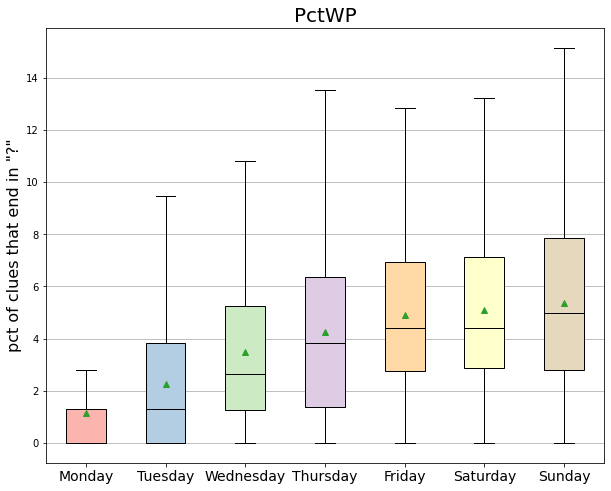

In [18]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(wp['list'],
                   patch_artist=True, 
                   medianprops=dict(color='black'), 
                   showfliers=False, 
                   showmeans=True)
ax.set_xticklabels(wp['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('pct of clues that end in "?"',fontsize=16)
ax.set_title('PctWP',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="PctWP.png")
plt.show()

## PctPNC

In [19]:
pnc = ccfeatures.groupby(['WeekdayNum','Weekday'])['PctPNC'].agg([np.mean, list]).reset_index().copy()

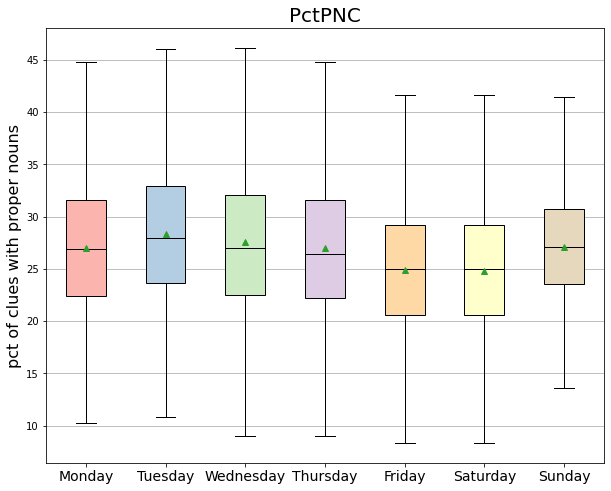

In [20]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(pnc['list'],
                   patch_artist=True, 
                   medianprops=dict(color='black'), 
                   showfliers=False, 
                   showmeans=True)
ax.set_xticklabels(pnc['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('pct of clues with proper nouns',fontsize=16)
ax.set_title('PctPNC',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="PctPNC.png")
plt.show()

## NumRepeatedAnswers_Norm

In [21]:
repeats = features.groupby(['WeekdayNum','Weekday'])['NumRepeatedAnswers_Norm'].agg([np.mean, list]).reset_index().copy()

In [22]:
title = str(features.columns[13])
title

'NumRepeatedAnswers_Norm'

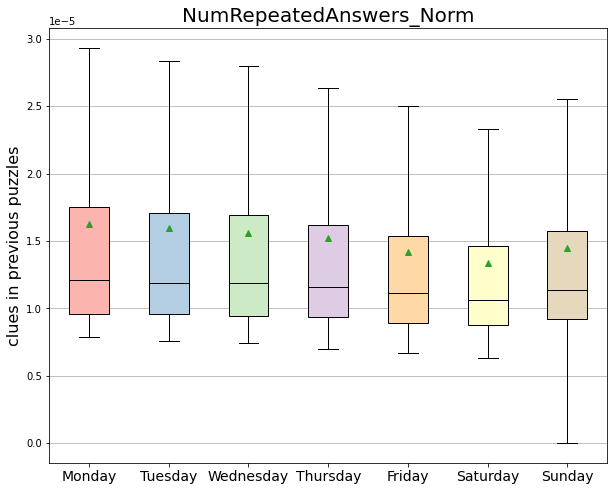

In [23]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(repeats['list'],
                   patch_artist=True, 
                   medianprops=dict(color='black'), 
                   showfliers=False, 
                   showmeans=True)
ax.set_xticklabels(repeats['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('clues in previous puzzles',fontsize=16)
ax.set_title(title,fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname=title+".png")
plt.show()

## PctOneWdHints

This feature counts the number of one-word hints as a percentage of the total hints for a particular puzzle.

In [24]:
onewd = features.groupby(['WeekdayNum','Weekday'])['PctOneWdHints'].agg([np.mean, list]).reset_index().copy()
onewd

,WeekdayNum,Weekday,mean,list
0,0,Monday,14.230187,"[21.052631578947366, 11.428571428571429, 21.62..."
1,1,Tuesday,12.510068,"[16.666666666666664, 34.61538461538461, 21.621..."
2,2,Wednesday,12.485375,"[30.0, 20.51282051282051, 10.256410256410255, ..."
3,3,Thursday,16.025762,"[24.35897435897436, 14.102564102564102, 18.421..."
4,4,Friday,15.035198,"[16.666666666666664, 17.142857142857142, 27.02..."
5,5,Saturday,15.690659,"[22.727272727272727, 30.76923076923077, 21.428..."
6,6,Sunday,15.604428,"[19.411764705882355, 25.0, 20.28985507246377, ..."


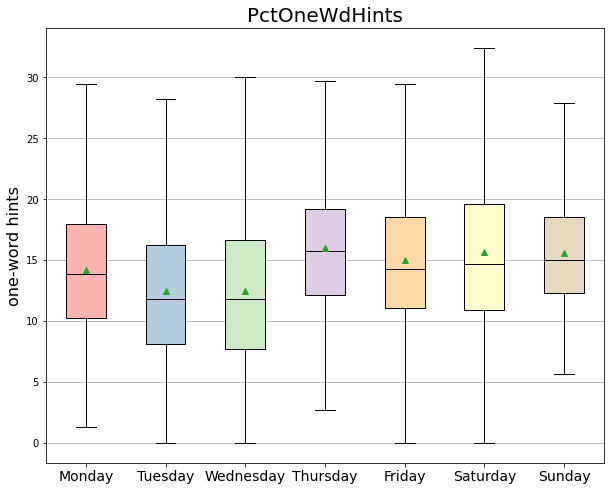

In [25]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
bplot = ax.boxplot(onewd['list'],
                   patch_artist=True, 
                   medianprops=dict(color='black'), 
                   showfliers=False, 
                   showmeans=True)
ax.set_xticklabels(onewd['Weekday'].tolist(),fontsize=14)
ax.set_ylabel('one-word hints',fontsize=16)
ax.set_title('PctOneWdHints',fontsize=20)
ax.grid(True,axis='y')

cmap = cm.get_cmap('Pastel1')

for patch, color in zip(bplot['boxes'], cmap.colors):
    patch.set_facecolor(color)
plt.savefig(fname="PctOneWdHints.png")
plt.show()